# Nova Financial Solutions - Exploratory Data Analysis (EDA)

## Data Cleaning and Processing

### Import Functions
In this section, import all necessary modules from the `shared` module to load and clean the raw dataset.

In [ ]:
from shared.dataset_loader import load_raw_dataset
from shared.data_cleaning import (
     date_to_datetime,
     handle_missing_values, 
     standardize_text,
     handle_duplicates,
     save_processed_dataset
)

### Load Raw Dataset
First, we need to load the raw dataset using the `load_raw_dataset` function. This function loads the data from a CSV file and returns a Pandas DataFrame.

In [ ]:
raw_data = load_raw_dataset()

### Convert date to datetime
This function takes the raw dataset as input and converts any date columns to datetime format.

In [ ]:
processed_data = date_to_datetime(raw_data)

### Handle missing values
The `handle_missing_values` function handles missing values in the dataset. It Drop rows with empty headline, url, date, stock columns and Replace empty row publisher column with Unknown.

In [ ]:
# Call the handle_missing_values function on the processed dataset
processed_data = handle_missing_values(processed_data)

### Standardize text
The `standardize_text` function is used to standardize text data in the dataset. It performs tasks such as converting text to lowercase, removing special characters or punctuation.

In [ ]:
# Call the standardize_text function on the processed dataset
processed_data = standardize_text(processed_data)

### Handle duplicates
The `handle_duplicates` function deals with duplicate records in the dataset. It Check for duplicate rows based on the url column & Keep only the row with the latest date compared to all duplicate rows.

In [ ]:
# Call the handle_duplicates function on the processed dataset
processed_data = handle_duplicates(processed_data)

### Save processed dataset
The `save_processed_dataset` function allows to save the cleaned and preprocessed dataset to a CSV file. Create the output folder if it doesn't exist and Save the cleaned dataset.

In [ ]:
# Save the processed dataset
output_folder = os.path.join('..', 'data', 'processed') 
save_processed_dataset(processed_data, output_folder)

## Data Analysis using the Cleaned and Processed Dataset

### Import Functions
In this section, import all necessary functions from the `shared` module for loading the cleaned dataset and perfom analysis.

In [2]:

from IPython.display import display
import matplotlib.pyplot as plt

from shared.dataset_loader import load_cleaned_dataset

from shared.descriptive_analysis import (
     get_text_length_stats,
     count_articles_per_publisher,
     identify_unique_domains
)
from shared.inferential_analysis import (
     analyze_publication_dates,
     perform_sentiment_analysis,
)
from shared.data_visualization import (
     visualize_publication_dates
)

### Load Cleaned Dataset
First, we need to load the cleaned dataset using the `load_cleaned_dataset` function. This function loads the data from a CSV file and returns a Pandas DataFrame.

In [3]:
cleaned_data = load_cleaned_dataset()

## Descriptive Statistical Analysis
In this section, we define functions that perform Descriptive statistical data analysis tasks on a iven dataset.


### Text length stats

This function calculates various statistics related to the length of the headlines in the given dataset. It takes the dataset as input and returns a dictionary with the following statistics:

- `mean`: The mean length of the headlines.
- `median`: The median length of the headlines.
- `minimum`: The minimum length of the headlines.
- `maximum`: The maximum length of the headlines.
- `standard_deviation`: The standard deviation of the lengths of the headlines.


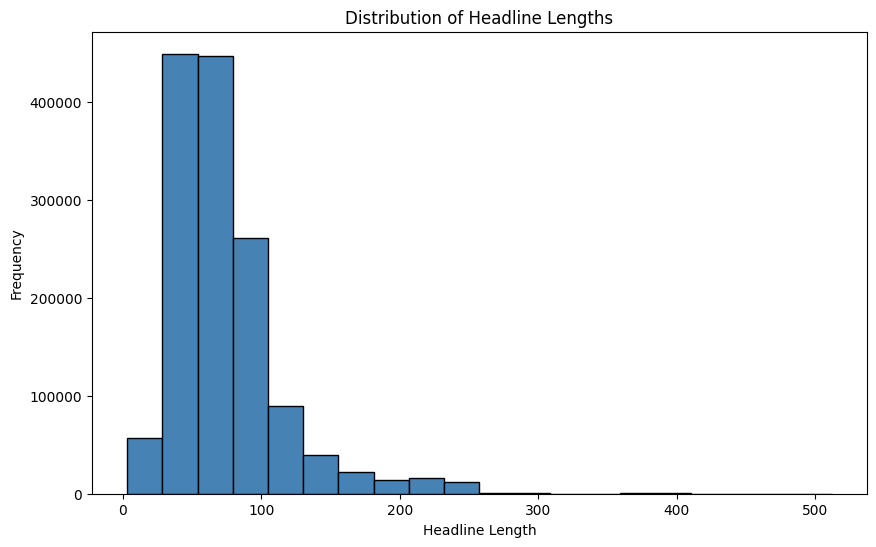

Headline Length Statistics:
mean: 73.12051490484095
median: 64.0
minimum: 3
maximum: 512
standard_deviation: 40.73530993195065


In [3]:
# Example usage
stats = get_text_length_stats(cleaned_data)
print("Headline Length Statistics:")
for key, value in stats.items():
    print(f"{key}: {value}")

### Count number of articles per publisher

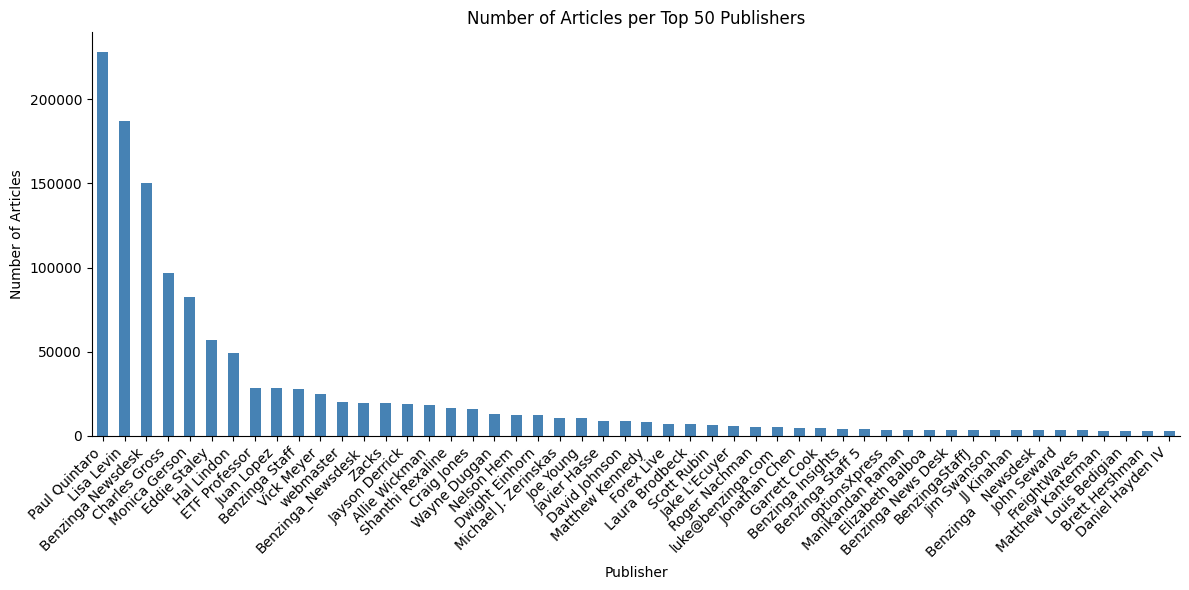

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [5]:
publisher_counts = count_articles_per_publisher(cleaned_data)
print(publisher_counts)

### Identify unique domains

In [5]:
unique_domains = identify_unique_domains(cleaned_data)
# Print the results
print("Unique Domains:")
print(unique_domains)

Unique Domains:
['' 'benzinga' 'gmail' 'andyswan' 'investdiva' 'eosdetroit' 'tothetick'
 'forextraininggroup' 'stockmetrix']


## Inferential Statistical Data Analysis
In this section, we define functions that perform Inferential statistical data analysis tasks on the cleaned dataset.

### Analyze the publication dates
Analyze the publication dates in the dataset to identify trends over time

News Frequency by Day of the Week:
day
0.0    10322
1.0    11002
2.0    11891
3.0    12688
4.0     9381
5.0      267
6.0      436
Name: headline, dtype: int64
News Frequency by Month and Year:
year    month
2011.0  4.0         6
        5.0        78
        6.0        96
        7.0       137
        8.0       149
                 ... 
2020.0  2.0      2356
        3.0      4680
        4.0      4616
        5.0      9333
        6.0      5990
Name: headline, Length: 111, dtype: int64


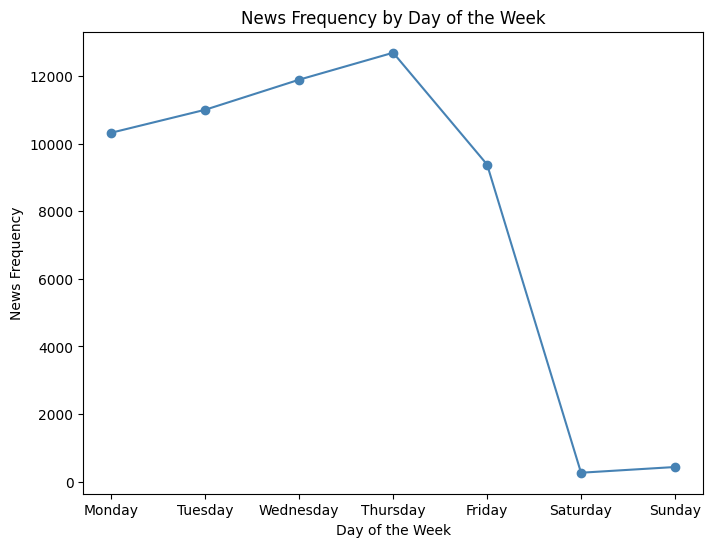

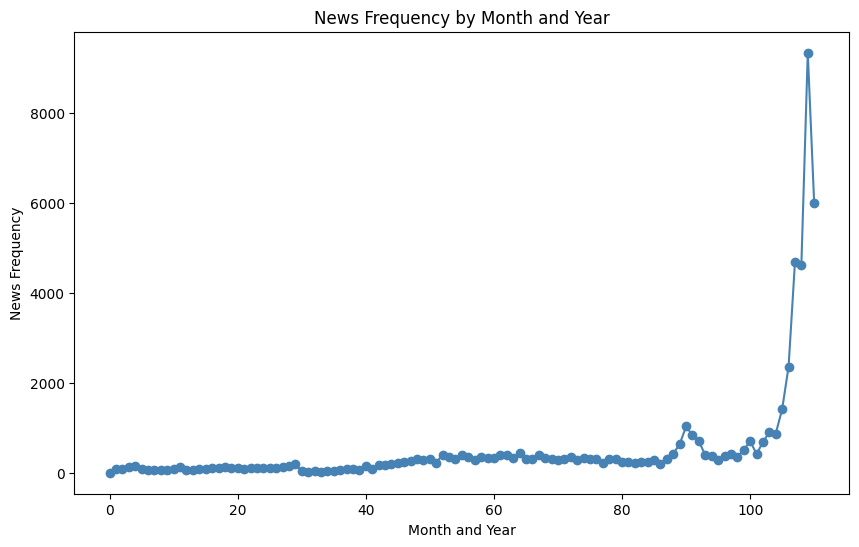

In [4]:
news_frequency, news_frequency_monthly = analyze_publication_dates(cleaned_data)
visualize_publication_dates(news_frequency, news_frequency_monthly)

### Perform sentiment analysis on headlines

In [5]:
sentiment_scores = perform_sentiment_analysis(cleaned_data)
display(sentiment_scores)

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
           ... 
1407323    0.15
1407324    0.15
1407325    0.00
1407326    0.00
1407327    0.00
Name: headline, Length: 1407328, dtype: float64